#Download & Unzip Data 



In [1]:
!pip install googleDriveFileDownloader #安裝套件語法 !pip install {套件名稱}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from googleDriveFileDownloader import googleDriveFileDownloader
gdownloader = googleDriveFileDownloader()
gdownloader.downloadFile("https://drive.google.com/uc?id=1kwYYWL67O0Dcbx3dvZIfbGg9NiHdyisr&export=download") # 連結到home work 1 data並下載

Download is starting
FILENAME ::: images.zip


0

In [3]:
!mkdir images
!unzip /content/images.zip -d ./images

串流輸出內容已截斷至最後 5000 行。
  inflating: ./images/images/n02167151/n02167151_15357.JPEG  
  inflating: ./images/images/n02167151/n02167151_1540.JPEG  
  inflating: ./images/images/n02167151/n02167151_15421.JPEG  
  inflating: ./images/images/n02167151/n02167151_15446.JPEG  
  inflating: ./images/images/n02167151/n02167151_1545.JPEG  
  inflating: ./images/images/n02167151/n02167151_15459.JPEG  
  inflating: ./images/images/n02167151/n02167151_15503.JPEG  
  inflating: ./images/images/n02167151/n02167151_15506.JPEG  
  inflating: ./images/images/n02167151/n02167151_15507.JPEG  
  inflating: ./images/images/n02167151/n02167151_15547.JPEG  
  inflating: ./images/images/n02167151/n02167151_15558.JPEG  
  inflating: ./images/images/n02167151/n02167151_15578.JPEG  
  inflating: ./images/images/n02167151/n02167151_15605.JPEG  
  inflating: ./images/images/n02167151/n02167151_1564.JPEG  
  inflating: ./images/images/n02167151/n02167151_15641.JPEG  
  inflating: ./images/images/n02167151/n02167151_156

#1

##Pytorch

###Data & Normalize


In [16]:
file_train = open("/content/images/train.txt")
file_test = open("/content/images/test.txt")
file_val = open("/content/images/val.txt")

In [17]:
train_path = list()
train_label = list()
for line in file_train:
  (path, label) = line.split()
  train_path.append(path)
  train_label.append(label)

In [18]:
test_path = list()
test_label = list()
for line in file_test:
  (path, label) = line.split()
  test_path.append(path)
  test_label.append(label)

In [19]:
val_path = list()
val_label = list()
for line in file_val:
  (path, label) = line.split()
  val_path.append(path)
  val_label.append(label)

In [20]:
file_train.close()
file_test.close()
file_val.close()

In [21]:
import numpy as np
from tqdm import tqdm
import cv2

trnimg = list()
trnlab = list()
max_vals = list()
for i in tqdm(train_path):
  img = cv2.imread(f"/content/images/{i}", cv2.IMREAD_GRAYSCALE)
  img = img/255
  img_resize = cv2.resize(img, (64,64)).reshape(1,64,64)
  trnimg.append(img_resize)
for i in tqdm(range(len(train_label))):
  label = np.zeros(50)
  label[int(train_label[i])] = 1
  trnlab.append(label)

trnimg = np.array(trnimg).astype("float32")
trnlab = np.array(trnlab).astype("float32")

100%|██████████| 63325/63325 [00:00<00:00, 560224.89it/s]


In [22]:
tstimg = list()
tstlab = list()
for i in tqdm(test_path):
  img = cv2.imread(f"/content/images/{i}", cv2.IMREAD_GRAYSCALE)
  img = img/255
  img_resize = cv2.resize(img, (64,64)).reshape(1,64,64)
  tstimg.append(img_resize)
for i in tqdm(range(len(test_label))):
  label = np.zeros(50)
  label[int(test_label[i])] = 1
  tstlab.append(label)

tstimg = np.array(tstimg).astype("float32")
tstlab = np.array(tstlab).astype("float32")

100%|██████████| 450/450 [00:00<00:00, 482350.32it/s]


In [23]:
valimg = list()
vallab = list()
for i in tqdm(val_path):
  img = cv2.imread(f"/content/images/{i}", cv2.IMREAD_GRAYSCALE)
  img = img/255
  img_resize = cv2.resize(img, (64,64)).reshape(1,64,64)
  valimg.append(img_resize)
for i in tqdm(range(len(val_label))):
  label = np.zeros(50)
  label[int(val_label[i])] = 1
  vallab.append(label)
  
valimg = np.array(valimg).astype("float32")
vallab = np.array(vallab).astype("float32")

100%|██████████| 450/450 [00:00<00:00, 204933.42it/s]


###Dataloader

In [24]:
import torch
from torch.utils.data import DataLoader, TensorDataset

trnimg = torch.tensor(trnimg)
trnlab = torch.tensor(trnlab)
tstimg = torch.tensor(tstimg)
tstlab = torch.tensor(tstlab)
valimg = torch.tensor(valimg)
vallab = torch.tensor(vallab)

train = TensorDataset(trnimg, trnlab)
test = TensorDataset(tstimg, tstlab)
val = TensorDataset(valimg, vallab)

train_loader = DataLoader(dataset = train, batch_size = 16, shuffle = True)
val_loader = DataLoader(dataset = val, batch_size = 16, shuffle = True)

###Model

In [28]:
from torch import nn, optim, flatten
from torch.utils.data import DataLoader, TensorDataset

D_in = 64*64
D_out = 50

model_torch = nn.Sequential(
      nn.MaxPool2d(2,2),
      nn.Conv2d(1,6,5),
      nn.Sigmoid(),
      nn.MaxPool2d(2,2),
      nn.Conv2d(6,16,5),
      nn.Sigmoid(),
      nn.MaxPool2d(2,2),
      nn.Flatten(),
      nn.Linear(16*5*5, 200),
      nn.Sigmoid(),
      nn.Linear(200,100),
      nn.Sigmoid(),
      nn.Linear(100,50),
      nn.Sigmoid()
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_torch.parameters(), lr = 1e-4)
print(model_torch)

Sequential(
  (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (2): Sigmoid()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): Sigmoid()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Linear(in_features=400, out_features=200, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=200, out_features=100, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=100, out_features=50, bias=True)
  (13): Sigmoid()
)


###Train

In [32]:
train_losses = list()
val_losses = list()
for epoch in tqdm(range(1,250+1)):
  for x_batch, y_batch in train_loader:
    y_pred = model_torch(x_batch)
    train_loss = criterion(y_pred, y_batch)

    train_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  model_torch.eval()
  for data, labels in val_loader:
    target = model_torch(data)
    val_loss = criterion(target,labels)
    

  if epoch % 25 == 0:
    print("%s%% iter: %s, train_loss: %s" % (100*epoch/250, epoch, train_loss))
    train_losses.append(train_loss)
    val_losses.append(val_loss)

 10%|█         | 25/250 [11:34<1:44:08, 27.77s/it]

10.0% iter: 25, train_loss: tensor(3.8993, grad_fn=<DivBackward1>)


 20%|██        | 50/250 [23:05<1:32:56, 27.88s/it]

20.0% iter: 50, train_loss: tensor(3.9086, grad_fn=<DivBackward1>)


 30%|███       | 75/250 [34:49<1:22:04, 28.14s/it]

30.0% iter: 75, train_loss: tensor(3.9004, grad_fn=<DivBackward1>)


 40%|████      | 100/250 [46:32<1:10:00, 28.00s/it]

40.0% iter: 100, train_loss: tensor(3.9016, grad_fn=<DivBackward1>)


 50%|█████     | 125/250 [58:11<58:11, 27.93s/it]

50.0% iter: 125, train_loss: tensor(3.9163, grad_fn=<DivBackward1>)


 60%|██████    | 150/250 [1:09:52<47:15, 28.35s/it]

60.0% iter: 150, train_loss: tensor(3.9164, grad_fn=<DivBackward1>)


 70%|███████   | 175/250 [1:21:35<35:02, 28.04s/it]

70.0% iter: 175, train_loss: tensor(3.9030, grad_fn=<DivBackward1>)


 80%|████████  | 200/250 [1:33:21<23:30, 28.22s/it]

80.0% iter: 200, train_loss: tensor(3.9019, grad_fn=<DivBackward1>)


 90%|█████████ | 225/250 [1:45:04<11:39, 27.99s/it]

90.0% iter: 225, train_loss: tensor(3.9019, grad_fn=<DivBackward1>)


100%|██████████| 250/250 [1:56:43<00:00, 28.01s/it]

100.0% iter: 250, train_loss: tensor(3.9020, grad_fn=<DivBackward1>)


###Predict

In [38]:
right = 0
wrong = 0


with torch.no_grad():
  for i in range(len(tstimg)):
    y_pred = model_torch(tstimg)
    _, predicted = torch.max(y_pred, 1)
    _, true = torch.max(tstlab, 1)
    if predicted[i] == true[i]:
      right += 1
    else:
      wrong += 1

###Result

In [43]:
trnloss = list()
for i in range(len(train_losses)):
  trnloss.append(train_losses[i].detach().numpy())

In [44]:
valloss = list()
for i in range(len(val_losses)):
  valloss.append(val_losses[i].detach().numpy())

accuracy: 0.02


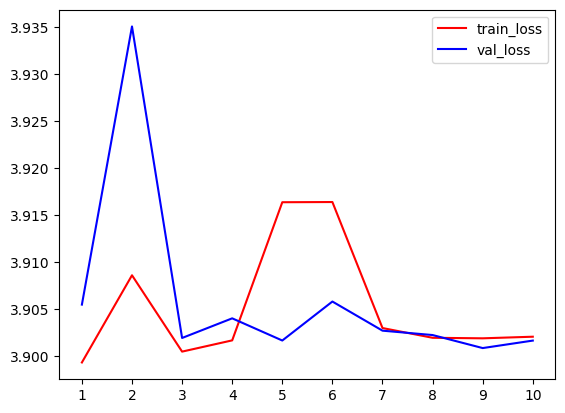

In [64]:
import matplotlib.pyplot as plt
accuracy = right / (right + wrong) 
print("accuracy:", accuracy)
plt.plot(trnloss, "r", label = "train_loss")
plt.plot(valloss, "b", label = "val_loss")
plt.xticks(range(10), range(1,11))
plt.legend()
plt.show()

##Tensorflow

###Data & Normalize


In [4]:
file_train = open("/content/images/train.txt")
file_test = open("/content/images/test.txt")
file_val = open("/content/images/val.txt")

In [5]:
train_path = list()
train_label = list()
for line in file_train:
  (path, label) = line.split()
  train_path.append(path)
  train_label.append(label)

In [6]:
test_path = list()
test_label = list()
for line in file_test:
  (path, label) = line.split()
  test_path.append(path)
  test_label.append(label)

In [7]:
val_path = list()
val_label = list()
for line in file_val:
  (path, label) = line.split()
  val_path.append(path)
  val_label.append(label)

In [8]:
file_train.close()
file_test.close()
file_val.close()

In [9]:
import numpy as np
from tqdm import tqdm
import cv2

trnimg = list()
trnlab = list()
max_vals = list()
for i in tqdm(train_path):
  img = cv2.imread(f"/content/images/{i}", cv2.IMREAD_GRAYSCALE)
  img = img/255
  img_resize = cv2.resize(img, (64,64)).reshape(64,64,1)
  trnimg.append(img_resize)
for i in tqdm(range(len(train_label))):
  label = np.zeros(50)
  label[int(train_label[i])] = 1
  trnlab.append(label)

trnimg = np.array(trnimg)
trnlab = np.array(trnlab)

100%|██████████| 63325/63325 [00:00<00:00, 466504.44it/s]


In [10]:
tstimg = list()
tstlab = list()
for i in tqdm(test_path):
  img = cv2.imread(f"/content/images/{i}", cv2.IMREAD_GRAYSCALE)
  img = img/255
  img_resize = cv2.resize(img, (64,64)).reshape(64,64,1)
  tstimg.append(img_resize)
for i in tqdm(range(len(test_label))):
  label = np.zeros(50)
  label[int(test_label[i])] = 1
  tstlab.append(label)

tstimg = np.array(tstimg)
tstlab = np.array(tstlab)

100%|██████████| 450/450 [00:00<00:00, 211075.46it/s]


In [11]:
valimg = list()
vallab = list()
for i in tqdm(val_path):
  img = cv2.imread(f"/content/images/{i}", cv2.IMREAD_GRAYSCALE)
  img = img/255
  img_resize = cv2.resize(img, (64,64)).reshape(64,64,1)
  valimg.append(img_resize)
for i in tqdm(range(len(val_label))):
  label = np.zeros(50)
  label[int(val_label[i])] = 1
  vallab.append(label)
  
valimg = np.array(valimg)
vallab = np.array(vallab)

100%|██████████| 450/450 [00:00<00:00, 205111.58it/s]


###Data Generator

In [12]:
import numpy as np
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x, y, batch_size):
        self.x = x # data
        self.y = y # label
        self.batch_size = batch_size # batch size      

    def __len__(self):
        return len(self.x) // self.batch_size # number of batches per epoch

    def __getitem__(self,ind):
        index = list()
        self.indexes = np.arange(len(self.x))
        for i in range(self.batch_size):
          a = np.random.choice(self.indexes)
          index.append(a)
        img = self.x[index]
        lab = self.y[index]

        return (np.array(img), np.array(lab)) # return a batch of data

In [13]:
trn_generator = DataGenerator(trnimg, trnlab, 16)
val_generator = DataGenerator(valimg, vallab, 16)

###Model

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model_tf = Sequential([
    layers.MaxPool2D(2,2, input_shape = (64,64,1)),
    layers.Conv2D(6,5,activation="sigmoid"),
    layers.MaxPool2D(2,2),
    layers.Conv2D(16,5,activation="sigmoid"),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(200,activation="sigmoid"),
    layers.Dense(100,activation="sigmoid"),
    layers.Dense(50,activation="sigmoid")
])
model_tf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2D  (None, 32, 32, 1)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                        

In [18]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50)
mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/DL/best_model_3.h5', monitor='val_accuracy', mode='max', save_best_only=True)

model_tf.compile(optimizer='adam', 
        loss="categorical_crossentropy",
        metrics=['accuracy'],
        )

###Fit

In [19]:
history = model_tf.fit(trn_generator, epochs = 250, validation_data = val_generator, callbacks = [es, mc])

Epoch 1/250
3957/3957 [==============================] - 48s 12ms/step - loss: 2.0109 - accuracy: 0.4311 - val_loss: 4.5934 - val_accuracy: 0.0871
Epoch 2/250
3957/3957 [==============================] - 48s 12ms/step - loss: 1.9965 - accuracy: 0.4338 - val_loss: 4.8271 - val_accuracy: 0.1049
Epoch 3/250
3957/3957 [==============================] - 57s 14ms/step - loss: 1.9722 - accuracy: 0.4401 - val_loss: 5.1319 - val_accuracy: 0.0737
Epoch 4/250
3957/3957 [==============================] - 56s 14ms/step - loss: 1.9604 - accuracy: 0.4445 - val_loss: 4.9817 - val_accuracy: 0.0558
Epoch 5/250
3957/3957 [==============================] - 47s 12ms/step - loss: 1.9546 - accuracy: 0.4450 - val_loss: 4.8426 - val_accuracy: 0.0647
Epoch 6/250
3957/3957 [==============================] - 45s 11ms/step - loss: 1.9470 - accuracy: 0.4489 - val_loss: 4.7240 - val_accuracy: 0.1138
Epoch 7/250
3957/3957 [==============================] - 46s 12ms/step - loss: 1.9265 - accuracy: 0.4498 - val_loss: 5

###Predict

In [20]:
predict = model_tf.predict(tstimg)

15/15 [==============================] - 0s 8ms/step


In [36]:
model_saved = tf.keras.models.load_model('/content/drive/MyDrive/DL/best_model_3.h5')
predict_saved = model_saved.predict(tstimg)

15/15 [==============================] - 0s 10ms/step


###Result

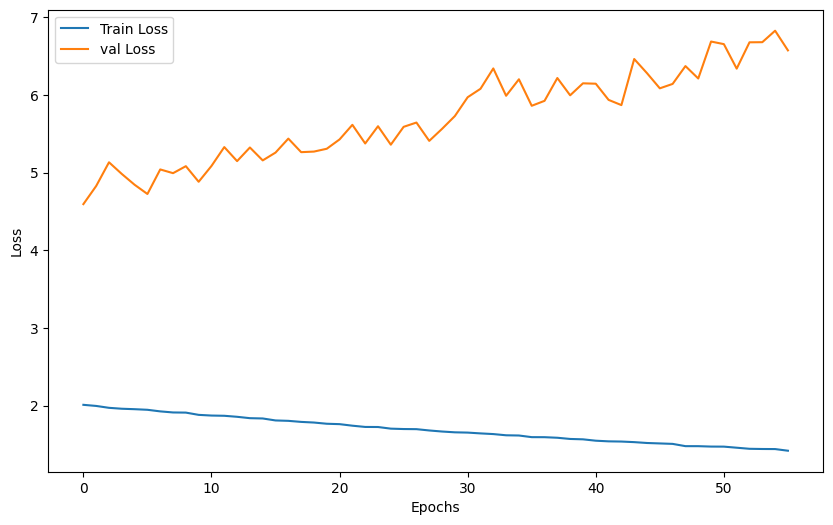

In [21]:
import matplotlib.pyplot as plt
trn_loss = history.history["loss"]
val_loss = history.history["val_loss"]
trn_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.figure(figsize=(10,6))
plt.plot(trn_loss, label="Train Loss")
plt.plot(val_loss, label="val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

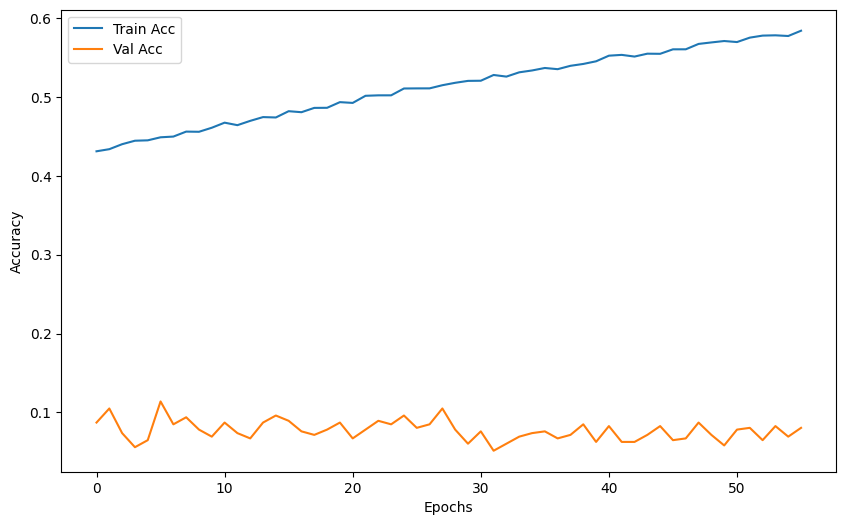

In [22]:
plt.figure(figsize=(10,6))
plt.plot(trn_acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
pred_label = list()
true_label = list()
for i in range(len(predict)):
  pred_label.append(predict[i].argmax())
  true_label.append(tstlab[i].argmax())
right = 0
wrong = 0

for i in range(len(pred_label)):
  if pred_label[i] == true_label[i]:
    right += 1
  else:
    wrong += 1

accuracy = right / (right + wrong)
print(accuracy)

0.08888888888888889


In [37]:
pred_saved_label = list()
for i in range(len(predict_saved)):
  pred_saved_label.append(predict_saved[i].argmax())
right_saved = 0
wrong_saved = 0

for i in range(len(pred_saved_label)):
  if pred_saved_label[i] == true_label[i]:
    right_saved += 1
  else:
    wrong_saved += 1

accuracy_saved = right_saved / (right_saved + wrong_saved)
print(accuracy_saved)

0.11333333333333333


#Static Graph

###Data & Normalize


In [1]:
file_train = open("/content/images/train.txt")
file_test = open("/content/images/test.txt")
file_val = open("/content/images/val.txt")

In [2]:
train_path = list()
train_label = list()
for line in file_train:
  (path, label) = line.split()
  train_path.append(path)
  train_label.append(label)

In [3]:
test_path = list()
test_label = list()
for line in file_test:
  (path, label) = line.split()
  test_path.append(path)
  test_label.append(label)

In [4]:
val_path = list()
val_label = list()
for line in file_val:
  (path, label) = line.split()
  val_path.append(path)
  val_label.append(label)

In [5]:
file_train.close()
file_test.close()
file_val.close()

In [6]:
import numpy as np
from tqdm import tqdm
import cv2

trnimg = list()
trnlab = list()
max_vals = list()
for i in tqdm(train_path):
  img = cv2.imread(f"/content/images/{i}", cv2.IMREAD_GRAYSCALE)
  img = img/255
  img_resize = cv2.resize(img, (64,64)).reshape(64,64,1)
  trnimg.append(img_resize)
for i in tqdm(range(len(train_label))):
  label = np.zeros(50)
  label[int(train_label[i])] = 1
  trnlab.append(label)

trnimg = np.array(trnimg)
trnlab = np.array(trnlab)

100%|██████████| 63325/63325 [00:00<00:00, 254203.77it/s]


In [7]:
tstimg = list()
tstlab = list()
for i in tqdm(test_path):
  img = cv2.imread(f"/content/images/{i}", cv2.IMREAD_GRAYSCALE)
  img = img/255
  img_resize = cv2.resize(img, (64,64)).reshape(64,64,1)
  tstimg.append(img_resize)
for i in tqdm(range(len(test_label))):
  label = np.zeros(50)
  label[int(test_label[i])] = 1
  tstlab.append(label)

tstimg = np.array(tstimg)
tstlab = np.array(tstlab)

100%|██████████| 450/450 [00:00<00:00, 367849.70it/s]


In [8]:
valimg = list()
vallab = list()
for i in tqdm(val_path):
  img = cv2.imread(f"/content/images/{i}", cv2.IMREAD_GRAYSCALE)
  img = img/255
  img_resize = cv2.resize(img, (64,64)).reshape(64,64,1)
  valimg.append(img_resize)
for i in tqdm(range(len(val_label))):
  label = np.zeros(50)
  label[int(val_label[i])] = 1
  vallab.append(label)
  
valimg = np.array(valimg)
vallab = np.array(vallab)

100%|██████████| 450/450 [00:00<00:00, 275941.05it/s]


###Data Generator

In [12]:
import numpy as np
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, x, y, batch_size):
        self.x = x # data
        self.y = y # label
        self.batch_size = batch_size # batch size      

    def __len__(self):
        return len(self.x) // self.batch_size # number of batches per epoch

    def __getitem__(self,ind):
        index = list()
        self.indexes = np.arange(len(self.x))
        for i in range(self.batch_size):
          a = np.random.choice(self.indexes)
          index.append(a)
        img = self.x[index]
        lab = self.y[index]

        return (np.array(img), np.array(lab)) # return a batch of data

In [13]:
trn_generator = DataGenerator(trnimg, trnlab, 16)
val_generator = DataGenerator(valimg, vallab, 16)

##model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers, Sequential

model_tf = Sequential([
    layers.MaxPool2D(2,2, input_shape = (64,64,1)),
    layers.Conv2D(6,5,activation="sigmoid"),
    layers.MaxPool2D(2,2),
    layers.Conv2D(16,5,activation="sigmoid"),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(200,activation="sigmoid"),
    layers.Dense(100,activation="sigmoid"),
    layers.Dense(50,activation="sigmoid")
])
optimizer = optimizers.Adam()

@tf.function
def model_func(x, y):
  y_pred = model_tf(x)
  loss = losses.CategoricalCrossentropy()(y_pred, y)
  return y_pred, loss

train_losses = list()
val_losses = list()

for epoch in tqdm(range(1,250+1)):
  trnloss = 0
  valloss = 0

  for x_batch, y_batch in trn_generator:
    with tf.GradientTape() as tape:
      y_pred, train_loss = model_func(x_batch, y_batch)
    gradients = tape.gradient(train_loss, model_tf.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model_tf.trainable_variables))
    trnloss += train_loss
    

  for val_x, val_y in val_generator:
    _, val_loss = model_func(valimg, vallab) 
    valloss += val_loss
  
  if epoch % 25 == 0:
    print("%s%% iter: %s, train_loss: %s" % (100*epoch/250, epoch, train_loss))
    train_losses.append(trnloss)
    val_losses.append(val_loss)

 10%|█         | 25/250 [55:18<8:18:12, 132.86s/it]

10.0% iter: 25, train_loss: tf.Tensor(7.525010179372062e-10, shape=(), dtype=float64)


 20%|██        | 50/250 [1:50:18<7:19:53, 131.97s/it]

20.0% iter: 50, train_loss: tf.Tensor(3.126828096881175e-10, shape=(), dtype=float64)


 30%|███       | 75/250 [2:45:12<6:24:55, 131.97s/it]

30.0% iter: 75, train_loss: tf.Tensor(1.9533946541126227e-10, shape=(), dtype=float64)


 40%|████      | 100/250 [3:40:20<5:32:03, 132.82s/it]

40.0% iter: 100, train_loss: tf.Tensor(1.4368746885901462e-10, shape=(), dtype=float64)


 50%|█████     | 125/250 [4:35:30<4:36:23, 132.67s/it]

50.0% iter: 125, train_loss: tf.Tensor(1.1139610489595736e-10, shape=(), dtype=float64)


 60%|██████    | 150/250 [5:30:52<3:41:50, 133.11s/it]

60.0% iter: 150, train_loss: tf.Tensor(9.006092899221227e-11, shape=(), dtype=float64)


 70%|███████   | 175/250 [6:26:11<2:45:43, 132.58s/it]

70.0% iter: 175, train_loss: tf.Tensor(7.426664149915499e-11, shape=(), dtype=float64)


 80%|████████  | 200/250 [7:21:47<1:51:01, 133.22s/it]

80.0% iter: 200, train_loss: tf.Tensor(7.024524790512188e-11, shape=(), dtype=float64)


 90%|████████▉ | 224/250 [8:14:51<57:48, 133.42s/it]

In [ ]:
right = 0
wrong = 0

for i in range(len(tstimg)):
  y_pred, _ = model_func(tstimg[i])
  y_pred = y_pred.argmax()
  y_true = tstlab.argmax()
  if y_pred == y_true[i]:
    right += 1
  else:
    wrong += 1

In [ ]:
import matplotlib.pyplot as plt
accuracy = right / (right + wrong) 
print("accuracy:", accuracy)
plt.plot(train_losses, "r", label = "train_loss")
plt.plot(val_losses, "b", label = "val_loss")
plt.xticks(range(10), range(1,11))
plt.legend()
plt.show()